In [1]:
import pickle

In [48]:
file = "BeetleFly_model.pkl"
with open(file, "rb") as f:
    tree = pickle.load(f)

In [49]:
print("Tree Type: ", type(tree))
print("Tree Keys: ", tree.keys())
print("Tree[0] Type: ", type(tree[0]))

Tree Type:  <class 'dict'>
Tree Keys:  dict_keys([0, 1, 2, 3, 4])
Tree[0] Type:  <class 'utils.train_utils.Node'>


In [6]:
# to list all (including methods) attributes, you can use:
print(dir(tree[0]))

['Testidx', 'Xpreds', 'Xpredsupto', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__firstlineno__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__static_attributes__', '__str__', '__subclasshook__', '__weakref__', 'bestmodel', 'bstmdlclass', 'falseidx', 'falseidxt', 'ginis', 'idx', 'leftchd', 'predcls', 'rightchd', 'stoptrain', 'testaccuupto', 'testfalseidx', 'testidx', 'testtrueidx', 'trainidx', 'trueidx', 'trueidxt', 'ycount']


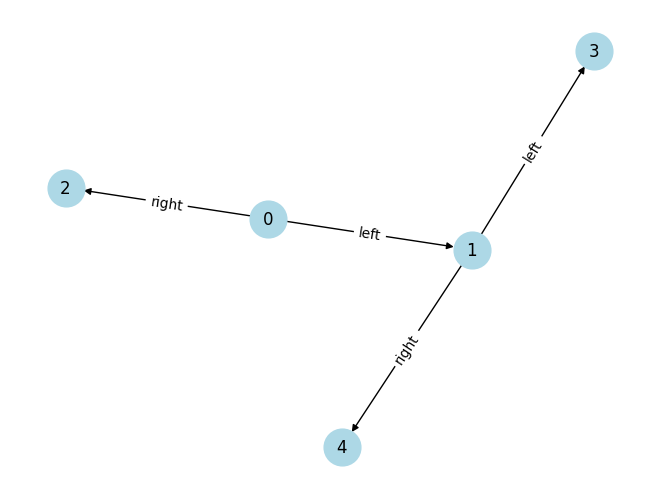

In [50]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for key, node in tree.items():
    # Add the node with label
    G.add_node(key, label=f'Node {key}')
    
    # Connect to left and right children if available
    if hasattr(node, "leftchd") and node.leftchd is not None:
        G.add_edge(key, node.leftchd, label='left')
    
    if hasattr(node, "rightchd") and node.rightchd is not None:
        G.add_edge(key, node.rightchd, label='right')

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', arrows=True)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

In [51]:
for i in tree:
    try:
        output_parts = [f"Node {i}: {tree[i].bestmodel}"]
        if hasattr(tree[i], 'leftchd') and tree[i].leftchd is not None:
            output_parts.append(f"leftchd: {tree[i].leftchd}")
        if hasattr(tree[i], 'rightchd') and tree[i].rightchd is not None:
            output_parts.append(f"rightchd: {tree[i].rightchd}")
        print(" ".join(output_parts))
    except AttributeError:
        # print(f"Node {i} does not have attribute 'bestmodel'.")
        print(f"Node {i} precls: {tree[i].predcls}")

Node 0: TL_NN1() leftchd: 1 rightchd: 2
Node 1: TL_NN1() leftchd: 3 rightchd: 4
Node 2 precls: 1
Node 3 precls: 0
Node 4 precls: 1


In [52]:
state_dict = tree[0].bestmodel.state_dict
model_data = state_dict()

In [53]:
# list keys
print(model_data.keys())

odict_keys(['t1', 't1_2', 't2', 't2_2', 't3', 't3_2', 'b1', 'b1_2', 'b2', 'b2_2', 'b3', 'b3_2', 'A1', 'A2', 'A3', 'A4', 'beta1', 'beta2', 'beta3', 'beta4'])


In [54]:
# Define the list of keys we're interested in
keys = ['t1', 't2', 't3', 'b1', 'b2', 'b3', 'A1', 'A2', 'A3', 'A4']

# Iterate over keys and print the shape. For tensors not of shape (1,1), also print range, max, and min values.
for key in keys:
    tensor_val = model_data[key]
    shape = tuple(tensor_val.shape)
    # Check if the shape is not (1,1)
    if shape != (1, 1):
        max_val = tensor_val.max().item()
        min_val = tensor_val.min().item()
        range_val = (min_val, max_val)
        print(f"{key}: Shape = {shape}, Range = {range_val}")
    else:
        print(f"{key}: Shape = {shape}")

t1: Shape = (1, 512), Range = (-2.02667236328125, 1.9288578033447266)
t2: Shape = (1, 512), Range = (-2.2294859886169434, 2.184966802597046)
t3: Shape = (1, 512), Range = (-2.284411668777466, 2.2190403938293457)
b1: Shape = (1, 512), Range = (-3.0688297748565674, 2.6813559532165527)
b2: Shape = (1, 512), Range = (-3.2637929916381836, 2.1187241077423096)
b3: Shape = (1, 512), Range = (-3.8083152770996094, 2.5376052856445312)
A1: Shape = (1, 512), Range = (-0.8456628322601318, 3.0335445404052734)
A2: Shape = (1, 512), Range = (-1.5994117259979248, 3.0043625831604004)
A3: Shape = (1, 512), Range = (-1.4536678791046143, 3.323633909225464)
A4: Shape = (1, 3), Range = (-0.5084089040756226, 1.5517784357070923)


In [55]:
import torch.nn.functional as F

normalized_keys = {}
for key in keys:
    tensor_val = model_data[key]
    key_sm = F.softmax(tensor_val, dim=-1)
    normalized_keys[key] = key_sm
    globals()[f"{key}_sm"] = key_sm  # assign to a dynamically named variable
    shape_sm = tuple(key_sm.shape)
    if shape_sm != (1, 1):
        max_val_sm = key_sm.max().item()
        min_val_sm = key_sm.min().item()
        range_sm = (min_val_sm, max_val_sm)
        print(f"{key}_sm: Shape = {shape_sm}, Range = {range_sm}")
    else:
        print(f"{key}_sm: Shape = {shape_sm}")

t1_sm: Shape = (1, 512), Range = (0.00014741373888682574, 0.007698443252593279)
t2_sm: Shape = (1, 512), Range = (8.037882071221247e-05, 0.006642231717705727)
t3_sm: Shape = (1, 512), Range = (7.327467756113037e-05, 0.006618786603212357)
b1_sm: Shape = (1, 512), Range = (6.481700984295458e-05, 0.020368685945868492)
b2_sm: Shape = (1, 512), Range = (5.5754160712240264e-05, 0.01213038619607687)
b3_sm: Shape = (1, 512), Range = (3.1569918064633384e-05, 0.01799996942281723)
A1_sm: Shape = (1, 512), Range = (0.00039154815021902323, 0.01894538849592209)
A2_sm: Shape = (1, 512), Range = (0.00017549302719999105, 0.01752481982111931)
A3_sm: Shape = (1, 512), Range = (0.00019180589879397303, 0.02278335951268673)
A4_sm: Shape = (1, 3), Range = (0.07447261363267899, 0.5844193696975708)


In [56]:
import torch
# Print the top 10 values and their indices for A1, A2, and A3 from normalized_keys
for key in ['A1', 'A2', 'A3']:
    t = normalized_keys[key]  # t is a torch.Tensor
    # Flatten the tensor to 1D to easily get the top 10 values regardless of its original shape
    flat_t = t.flatten()
    top_vals, top_indices = torch.topk(flat_t, 10)
    print(f"Top 10 for {key}:")
    print("Indices (in flattened tensor):", top_indices)
    print("Values:", top_vals)

print("A4 values: ", normalized_keys['A4'])

Top 10 for A1:
Indices (in flattened tensor): tensor([429, 442, 485, 439, 220, 155, 469,   0, 474, 476])
Values: tensor([0.0189, 0.0149, 0.0142, 0.0142, 0.0124, 0.0123, 0.0110, 0.0104, 0.0102,
        0.0088])
Top 10 for A2:
Indices (in flattened tensor): tensor([387,  97, 499, 349, 226, 486, 461, 287, 490, 228])
Values: tensor([0.0175, 0.0170, 0.0169, 0.0150, 0.0138, 0.0133, 0.0125, 0.0117, 0.0117,
        0.0116])
Top 10 for A3:
Indices (in flattened tensor): tensor([456, 225, 468, 506, 488, 498, 457, 467, 411, 230])
Values: tensor([0.0228, 0.0189, 0.0164, 0.0160, 0.0138, 0.0132, 0.0130, 0.0121, 0.0116,
        0.0106])
A4 values:  tensor([[0.0745, 0.3411, 0.5844]])


In [57]:
threshold_raw = torch.zeros_like(model_data['b1'])
threshold_fft = torch.zeros_like(model_data['b2'])
threshold_der = torch.zeros_like(model_data['b3'])

threshold_raw = model_data['b1'] / model_data['t1']
threshold_fft = model_data['b2'] / model_data['t2']
threshold_der = model_data['b3'] / model_data['t3']

In [58]:
# Get the top 5 values and their corresponding indices from threshold_raw
top5_fft_vals, top5_fft_indices = torch.topk(threshold_raw.flatten(), 5)
print("Top 5 values from threshold_raw:")
print("Indices:", top5_fft_indices)
print("Values:", top5_fft_vals)

# Get the top 5 values and their corresponding indices from threshold_fft
top5_fft_vals, top5_fft_indices = torch.topk(threshold_fft.flatten(), 5)
print("\nTop 5 values from threshold_fft:")
print("Indices:", top5_fft_indices)
print("Values:", top5_fft_vals)

# Get the top 5 values and their corresponding indices from threshold_raw
top5_raw_vals, top5_raw_indices = torch.topk(threshold_raw.flatten(), 5)
print("\nTop 5 values from threshold_raw:")
print("Indices:", top5_raw_indices)
print("Values:", top5_raw_vals)

Top 5 values from threshold_raw:
Indices: tensor([ 51, 124, 389, 284,  82])
Values: tensor([214.0916, 179.4128, 154.1342,  43.5349,  11.0441])

Top 5 values from threshold_fft:
Indices: tensor([162, 413, 458,  92, 107])
Values: tensor([41.1904, 23.4333, 10.4608,  8.1656,  7.3808])

Top 5 values from threshold_raw:
Indices: tensor([ 51, 124, 389, 284,  82])
Values: tensor([214.0916, 179.4128, 154.1342,  43.5349,  11.0441])


In [66]:
from utils.datautils import Readdataset, Multi_view, calculate_dataset_metrics
Dataset_name = "BeetleFly"
dataset_path_ = "../UCRArchive_2018/"
# normalize_dataset = True
Xtrain, ytrain, Xval, yval, Xtest, ytest = Readdataset(dataset_path_, Dataset_name)
# Xtrain, Xval, Xtest = Multi_view(Xtrain_raw, Xval_raw, Xtest_raw)
N, T = calculate_dataset_metrics(Xtrain)
print("Training Samples:", N)
print("Time Series Length:", T)


Training Samples: 20
Time Series Length: 512


In [69]:
from utils.datautils import Splitview
Xraw, Xfft, Xder = Splitview(Xtrain,T)
print("Xraw shape:", Xraw.shape)
print("Xfft shape:", Xfft.shape)
print("Xder shape:", Xder.shape)

Xraw shape: (20, 512)
Xfft shape: (20, 512)
Xder shape: (20, 512)


In [138]:
np.arange(100,150)

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149])

In [145]:
Xraw.shape

(0, 512)

KeyError: 'y'

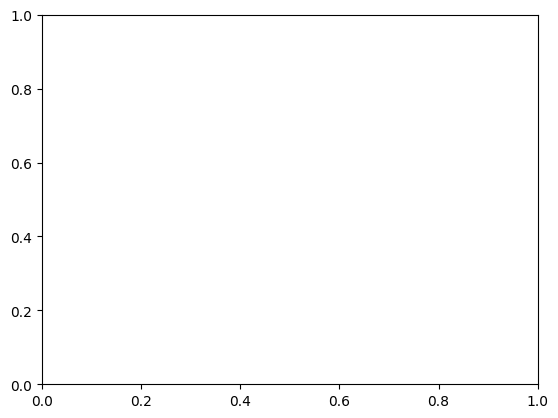

In [147]:
import seaborn as sns
sns.lineplot(x = np.arange(100, 150), y = Xraw[100:150])

In [136]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Assume Xraw is of shape (N, T)
N, T = Xraw.shape

df = pd.DataFrame({
    'Time': np.tile(np.arange(T), N),
    'Value': Xder.flatten(),
    'Label': np.repeat(ytrain, T)
})

sns.lineplot(data=df, x='Time', y='Value', hue='Label', estimator=None)
plt.title("Xraw Time Series by Label")
plt.legend(title='Label')
plt.show()


ValueError: All arrays must be of the same length

In [76]:
df

,Time,Value,Label
0,0,0.623614,1.0
1,1,0.623614,1.0
2,2,-1.184347,1.0
3,3,-1.125274,1.0
4,4,-1.283607,1.0
...,...,...,...
10235,507,0.885867,0.0
10236,508,0.748874,0.0
10237,509,0.167434,0.0
10238,510,-0.361498,0.0


In [85]:
threshold_der[0, 456]

tensor(0.1174)

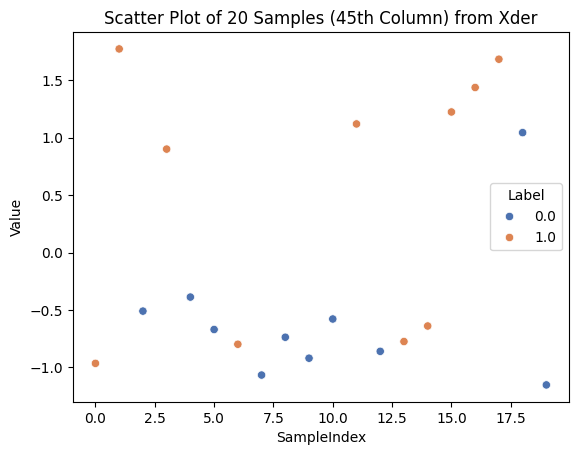

In [83]:
df = pd.DataFrame({
    'SampleIndex': np.arange(20),
    'Value': Xder[:20, 456],
    'Label': ytrain[:20]
})

sns.scatterplot(data=df, x='SampleIndex', y='Value', hue='Label', palette='deep')
plt.title("Scatter Plot of 20 Samples (45th Column) from Xder")
plt.show()

In [65]:
Xtrain.shape

(20, 1536)

In [ ]:
import numpy as np
parameters = extract_parameters(tree[0].bestmodel, 0)


In [ ]:
parameters.keys()

In [ ]:
# np.max(parameters['A1'])
for param_name, param_val in parameters.items():
    max_val = np.max(param_val)
    dims = param_val.shape
    print(f"{param_name}: Max = {max_val}, Dimensions = {dims}")

In [ ]:
for idx, num in enumerate(parameters['A1'][0][:]):
    if num > 3:
        print(f"Node {idx}: {num}")

In [ ]:
normal_A1 = A_sm1 / A_sm1.sum()
print(normal_A1)


In [ ]:
A1

In [ ]:
parameters['t1'].shape

In [ ]:
parameters['t1']

In [124]:
df = pd.read_csv("../UCRArchive_2018/BeetleFly/BeetleFly_TRAIN.tsv", sep = '\t', header = None)
df.columns = ['labels'] + [f"t_{i+1}" for i in range(df.shape[1]-1)]
df.head()

,labels,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_503,t_504,t_505,t_506,t_507,t_508,t_509,t_510,t_511,t_512
0,1,1.246789,1.174937,1.068819,0.964319,0.895219,0.790473,0.720885,0.688010,0.587988,...,0.553637,0.650269,0.718853,0.805717,0.865237,0.956820,1.057206,1.126484,1.221802,1.286670
1,1,0.825876,0.881314,0.818073,0.674205,0.546963,0.485933,0.375458,0.265118,0.154929,...,-0.168363,-0.093108,-0.001327,0.084480,0.192384,0.321336,0.450300,0.558373,0.646437,0.755256
2,1,2.132830,2.029373,1.940484,1.852180,1.799809,1.696186,1.610549,1.527823,1.439301,...,1.347620,1.431956,1.531713,1.612717,1.694647,1.796306,1.879709,1.962100,2.063447,2.149849
3,1,0.874412,0.923000,0.964207,0.944243,0.811593,0.663741,0.516367,0.352022,0.269166,...,0.172339,0.226525,0.233978,0.293486,0.360640,0.425044,0.586582,0.610465,0.679952,0.801962
4,1,0.972615,1.112579,1.183380,1.164712,1.028599,0.909215,0.851048,0.713570,0.577246,...,-0.225026,-0.182151,-0.062613,0.061609,0.187914,0.316121,0.446066,0.577601,0.707684,0.838184


In [125]:
classes = df.pop('labels')
type(classes)

pandas.core.series.Series

In [126]:
df.columns

Index(['t_1', 't_2', 't_3', 't_4', 't_5', 't_6', 't_7', 't_8', 't_9', 't_10',
       ...
       't_503', 't_504', 't_505', 't_506', 't_507', 't_508', 't_509', 't_510',
       't_511', 't_512'],
      dtype='object', length=512)

In [133]:
np.max(df.values, axis=1, keepdims=True)

array([[2.3640253],
       [2.2816215],
       [2.167464 ],
       [2.1725102],
       [2.3433617],
       [2.1174287],
       [2.029091 ],
       [2.2419119],
       [2.0961841],
       [2.3189746],
       [2.5055261],
       [2.4042753],
       [2.078076 ],
       [2.4091278],
       [2.3349795],
       [2.3102576],
       [2.2013812],
       [2.1958942],
       [2.0512292],
       [2.0743473]])

In [127]:
df_norm = pd.DataFrame(df.values - np.min(df.values, axis = 1, keepdims=True) / (np.max(df.values, axis = 1, keepdims=True) - np.min(df.values, axis = 1, keepdims=True)),  columns = df.columns, index= df.index)
df_norm['labels'] = classes
df_norm.head()

,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,...,t_504,t_505,t_506,t_507,t_508,t_509,t_510,t_511,t_512,labels
0,1.687396,1.615545,1.509426,1.404927,1.335826,1.231080,1.161493,1.128618,1.028596,0.959102,...,1.090877,1.159461,1.246325,1.305845,1.397428,1.497814,1.567091,1.662409,1.727278,1
1,1.256784,1.312222,1.248981,1.105112,0.977870,0.916840,0.806366,0.696026,0.585836,0.475810,...,0.337799,0.429581,0.515388,0.623292,0.752243,0.881207,0.989280,1.077345,1.186163,1
2,2.585512,2.482054,2.393165,2.304861,2.252491,2.148867,2.063231,1.980505,1.891982,1.789498,...,1.884637,1.984394,2.065398,2.147329,2.248988,2.332390,2.414781,2.516128,2.602530,1
3,1.313273,1.361861,1.403068,1.383103,1.250454,1.102602,0.955227,0.790883,0.708027,0.710766,...,0.665386,0.672839,0.732347,0.799501,0.863905,1.025443,1.049326,1.118813,1.240823,1
4,1.463192,1.603156,1.673957,1.655289,1.519176,1.399792,1.341625,1.204148,1.067823,0.936275,...,0.308426,0.427964,0.552186,0.678491,0.806698,0.936643,1.068178,1.198261,1.328761,1


In [119]:
df_norm['signal_id'] = [f"signal_{i+1}" for i in range(len(df_norm))]
df_norm.head(5)

,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,...,t_505,t_506,t_507,t_508,t_509,t_510,t_511,t_512,labels,signal_id
0,1.687396,1.615545,1.509426,1.404927,1.335826,1.231080,1.161493,1.128618,1.028596,0.959102,...,1.159461,1.246325,1.305845,1.397428,1.497814,1.567091,1.662409,1.727278,1,signal_1
1,1.256784,1.312222,1.248981,1.105112,0.977870,0.916840,0.806366,0.696026,0.585836,0.475810,...,0.429581,0.515388,0.623292,0.752243,0.881207,0.989280,1.077345,1.186163,1,signal_2
2,2.585512,2.482054,2.393165,2.304861,2.252491,2.148867,2.063231,1.980505,1.891982,1.789498,...,1.984394,2.065398,2.147329,2.248988,2.332390,2.414781,2.516128,2.602530,1,signal_3
3,1.313273,1.361861,1.403068,1.383103,1.250454,1.102602,0.955227,0.790883,0.708027,0.710766,...,0.672839,0.732347,0.799501,0.863905,1.025443,1.049326,1.118813,1.240823,1,signal_4
4,1.463192,1.603156,1.673957,1.655289,1.519176,1.399792,1.341625,1.204148,1.067823,0.936275,...,0.427964,0.552186,0.678491,0.806698,0.936643,1.068178,1.198261,1.328761,1,signal_5


In [123]:
df_long = df_norm.melt(id_vars = ['labels', 'signal_id'], value_vars= [f"t_{i+1}" for i in range(512)], var_name = 'Timesteps', value_name= "Values")
df_long.Timesteps = df_long.Timesteps.str.replace('t_', '').astype(int)
df_long.head(25)

,labels,signal_id,Timesteps,Values
0,1,signal_1,1,1.687396
1,1,signal_2,1,1.256784
2,1,signal_3,1,2.585512
3,1,signal_4,1,1.313273
4,1,signal_5,1,1.463192
5,1,signal_6,1,1.163281
6,1,signal_7,1,2.508539
7,1,signal_8,1,1.040898
8,1,signal_9,1,2.529869
9,1,signal_10,1,2.226336
